In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
labels = train['label'].values
train.drop('label', axis = 1, inplace = True)

In [4]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [5]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [6]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

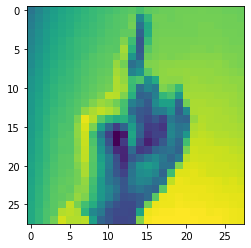

In [7]:
plt.imshow(images[0].reshape(28,28))

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [10]:
batch_size = 128
num_classes = 24
epochs = 50

In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [13]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

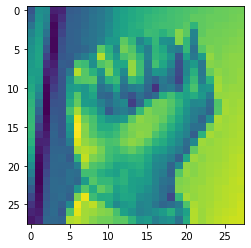

In [14]:
plt.imshow(x_train[0].reshape(28,28))

# CNN Model

In [15]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [17]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 97s 5ms/step - loss: 2.5680 - accuracy: 0.2095 - val_loss: 1.5703 - val_accuracy: 0.5075
Epoch 2/50
19218/19218 [==============================] - 90s 5ms/step - loss: 1.2243 - accuracy: 0.5940 - val_loss: 0.7873 - val_accuracy: 0.7512
Epoch 3/50
19218/19218 [==============================] - 88s 5ms/step - loss: 0.7261 - accuracy: 0.7498 - val_loss: 0.4852 - val_accuracy: 0.8448
Epoch 4/50
19218/19218 [==============================] - 88s 5ms/step - loss: 0.4928 - accuracy: 0.8306 - val_loss: 0.3487 - val_accuracy: 0.8743
Epoch 5/50
19218/19218 [==============================] - 96s 5ms/step - loss: 0.3309 - accuracy: 0.8889 - val_loss: 0.1955 - val_accuracy: 0.9460
Epoch 6/50
19218/19218 [==============================] - 96s 5ms/step - loss: 0.2366 - accuracy: 0.9200 - val_loss: 0.1349 - val_accuracy: 0.9603
Epoch 7/50
19218/19218 [==============================] - 91s 5ms/ste

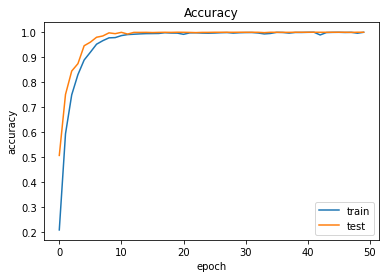

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

# Validation on test data

In [22]:
test_labels = test['label']

In [23]:
test.drop('label', axis = 1, inplace = True)

In [24]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [25]:
test_labels = label_binrizer.fit_transform(test_labels)

In [26]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [27]:
test_images.shape

(7172, 28, 28, 1)